<a href="https://colab.research.google.com/github/Eyabennessib/Machine-Learning/blob/main/TP5_R%C3%A9seau_de_neurones_profonds_pour_la_r%C3%A9gression_EyaBEN_NESSIB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ce TP s’intéresse à la prédiction des prix des appartements à partir d’un ensemble d’attributs. Vous serez amené à construire votre premier réseau de neurones profonds

# Prise en main de l’environnement de travail 

---

In [17]:
from psutil import * 
cpu_count() # indique le nombre de CPU 
!lscpu |grep 'Model name' # CPU mode and speed 
!df –h / | awk '{print $4}' # available Hard disk space 
!free –h –si | awk '/Mem:/{print $2}' # Usuable memory 
!nvidia-smi –L # GPU specifications.

Model name:          Intel(R) Xeon(R) CPU @ 2.20GHz
df: –h: No such file or directory
Available
69020032
13302920
/bin/bash: nvidia-smi: command not found


# A) Réseau de neurones profonds pour la régression 


In [95]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.wrappers.scikit_learn import KerasRegressor 
from pandas import read_csv 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import KFold 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split 

**Exercice 1 : Lecture et labellisation du jeu de données**

In [96]:
df = read_csv("housing_data_for_regression.csv", delim_whitespace=True, header=None)

In [97]:
df.describe() #Analyse du contenu df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [98]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT', 'MEDV'] 
df.columns = feature_names

In [99]:
print(df.head()) 

      CRIM    ZN  INDUS  CHAS    NOX  ...    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  ...  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  ...  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  ...  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  ...  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  ...  222.0     18.7  396.90   5.33  36.2

[5 rows x 14 columns]


In [100]:
df = df.rename(columns={'MEDV': 'PRICE'}) 
print(df.describe()) 

             CRIM          ZN       INDUS  ...           B       LSTAT       PRICE
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...  356.674032   12.653063   22.532806
std      8.601545   23.322453    6.860353  ...   91.294864    7.141062    9.197104
min      0.006320    0.000000    0.460000  ...    0.320000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...  375.377500    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...  391.440000   11.360000   21.200000
75%      3.677083   12.500000   18.100000  ...  396.225000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...  396.900000   37.970000   50.000000

[8 rows x 14 columns]


In [101]:
X = df.drop('PRICE', axis = 1) 
y = df['PRICE'] 

**Exercice 2 : Construction et entrainement du modèle**



In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20) 

On utilise **le StandardScaler** pour normaliser des données possedant des échelles différentes. 
Elles sont standardisées pour avoir une échelle commune lors de la création du modèle d'apprentissage automatique.

In [103]:
from sklearn.preprocessing import StandardScaler # importer l'algorithme Standardscaler
scaler=StandardScaler() #affecter l'algorithme au variable scaler
scaler.fit(X_train) #entraîner le modèle sur le training set
X_train_scaled = scaler.transform(X_train) 
#transformez les données d'entrainement de manière à ce que la variance soit unitaire et que la moyenne de la série soit égale à 0.
X_test_scaled = scaler.transform(X_test)
#transformez les données du test de manière à ce que la variance soit unitaire et que la moyenne de la série soit égale à 0.

Un modèle séquentiel est approprié pour une pile ordinaire de couches où chaque couche a exactement un tenseur d’entrée et un tenseur de sortie.
 
 
 Un modèle séquentiel n’est pas approprié lorsque :


*   le modèle a plusieurs entrées ou plusieurs sorties
*   Les couches a plusieurs entrées ou plusieurs sorties
*   faire du partage de couches


In [104]:
#choisir le modèle séquentiel
model = Sequential() 
model.add(Dense(128, input_dim=13, activation='relu')) #couche d'entrée avec 128 neurones et la dimension des données d'entrée est 13.
#avec une fonction d'activation relu "Rectified Linear Unit" : 
#La fonction renvoie 0 si elle reçoit une entrée négative, mais pour toute valeur positive x, elle renvoie cette valeur.
model.add(Dense(64, activation='relu')) #1ère sous couche avec 64 neurones possedant une fonction d'activation relu
model.add(Dense(1, activation='linear')) #couche de sortie avec un seul neurone et une fonction d'activation linear
#linear: l'activation est proportionnelle à l'entrée, 
#c'est-à-dire la somme pondérée des neurones. f(x) = ax + c.

In [105]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae']) 
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1792      
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100) 

Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 562.9862 - mae: 21.8281 - val_loss: 578.8874 - val_mae: 21.9771
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 496.5555 - mae: 20.2166 - val_loss: 498.5182 - val_mae: 20.0853
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 416.8576 - mae: 18.1764 - val_loss: 392.9578 - val_mae: 17.4613
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 312.9302 - mae: 15.3746 - val_loss: 261.5099 - val_mae: 13.9748
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 200.9881 - mae: 11.7996 - val_loss: 136.2373 - val_mae: 9.9210
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 111.2655 - mae: 8.2065 - val_loss: 64.9689 - val_mae: 6.6079
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 70.3749 - mae: 6.2964 - val_loss: 43.9883 - val_mae: 5.2821
Epoch 8/100
11/11 [=============================

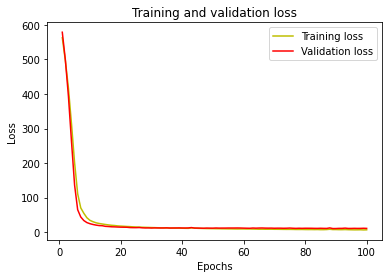

In [107]:
from matplotlib import pyplot as plt 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(loss) + 1) 
plt.plot(epochs, loss, 'y', label='Training loss') 
plt.plot(epochs, val_loss, 'r', label='Validation loss') 
plt.title('Training and validation loss') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show() 

Le training loss indique dans quelle mesure le modèle s'adapte aux données d'apprentissage, tandis que le validation loss indique dans quelle mesure le modèle s'adapte aux nouvelles données.
On constate, avec ces courbes, que le modèle est bien entraîné et que la fonction loss tend vers 0. Ce qui correspond à notre objectif.

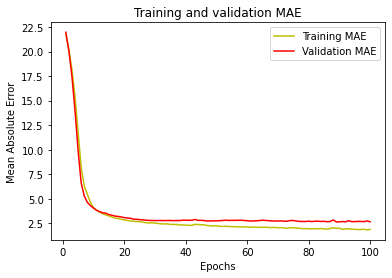

In [108]:
mae = history.history['mae'] 
val_mae = history.history['val_mae'] 
plt.plot(epochs, mae, 'y', label='Training MAE') 
plt.plot(epochs, val_mae, 'r', label='Validation MAE') 
plt.title('Training and validation MAE') 
plt.xlabel('Epochs') 
plt.ylabel('Mean Absolute Error') 
plt.legend() 
plt.show()

Maintenant, on compare la valeur de l'erreur absolue moyenne entre la 
courbe de training set et de validation set. On peut constater que l'erreur tend vers 0 au cours des epochs mais il ne s'annule pas. 

L'erreur se stabilise à une valeur de 2.
le mae du dataset de training est plus proche de 0 que le mae du dataset de validation ce qui est tout à fait normale puisque l'entraînement du modèle est basé sur le training set.

In [109]:
predictions = model.predict(X_test_scaled[:5]) 
print("Predicted values are: ", predictions) 
print("Real values are: ", y_test[:5]) 

Predicted values are:  [[18.084272]
 [20.463865]
 [20.547405]
 [20.18252 ]
 [12.684773]]
Real values are:  498    21.2
94     20.6
150    21.5
221    21.7
423    13.4
Name: PRICE, dtype: float64


In [110]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test) 
print('Mean squared error from neural net: ', mse_neural) 
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 3ms/step - loss: 15.1577 - mae: 2.8739
Mean squared error from neural net:  15.15771198272705
Mean absolute error from neural net:  2.8738884925842285


In [111]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =20) 

Epoch 1/20
11/11 [==============================] - 0s 7ms/step - loss: 6.5976 - mae: 1.8404 - val_loss: 11.0296 - val_mae: 2.6619
Epoch 2/20
11/11 [==============================] - 0s 5ms/step - loss: 6.4113 - mae: 1.8240 - val_loss: 10.5390 - val_mae: 2.6082
Epoch 3/20
11/11 [==============================] - 0s 4ms/step - loss: 7.2840 - mae: 1.9825 - val_loss: 11.1242 - val_mae: 2.6410
Epoch 4/20
11/11 [==============================] - 0s 4ms/step - loss: 6.5902 - mae: 1.8494 - val_loss: 11.7403 - val_mae: 2.7273
Epoch 5/20
11/11 [==============================] - 0s 4ms/step - loss: 6.5508 - mae: 1.8549 - val_loss: 11.3244 - val_mae: 2.6774
Epoch 6/20
11/11 [==============================] - 0s 4ms/step - loss: 6.1929 - mae: 1.8150 - val_loss: 11.1277 - val_mae: 2.6886
Epoch 7/20
11/11 [==============================] - 0s 4ms/step - loss: 6.1423 - mae: 1.8010 - val_loss: 10.7270 - val_mae: 2.6299
Epoch 8/20
11/11 [==============================] - 0s 4ms/step - loss: 6.1384 - ma

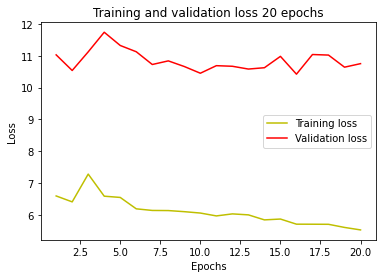

In [112]:
from matplotlib import pyplot as plt 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(loss) + 1) 
plt.plot(epochs, loss, 'y', label='Training loss') 
plt.plot(epochs, val_loss, 'r', label='Validation loss') 
plt.title('Training and validation loss 20 epochs') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show() 

la fonction loss pour la validation set est presque 11. 
Ceci nous indique que le modèle n'est pas vraiment stable à ce stade.

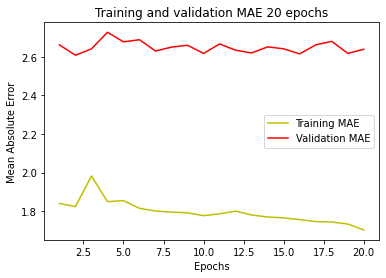

In [113]:
mae = history.history['mae'] 
val_mae = history.history['val_mae'] 
plt.plot(epochs, mae, 'y', label='Training MAE') 
plt.plot(epochs, val_mae, 'r', label='Validation MAE') 
plt.title('Training and validation MAE 20 epochs') 
plt.xlabel('Epochs') 
plt.ylabel('Mean Absolute Error') 
plt.legend() 
plt.show()

On peut voir que l'erreur moyen absolue est presque 2,5 sur la courbe de validation set.

In [114]:
predictions = model.predict(X_test_scaled[:5]) 
print("Predicted values are: ", predictions) 
print("Real values are: ", y_test[:5]) 

Predicted values are:  [[18.353724]
 [20.48421 ]
 [20.380991]
 [20.565289]
 [12.666644]]
Real values are:  498    21.2
94     20.6
150    21.5
221    21.7
423    13.4
Name: PRICE, dtype: float64


In [115]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test) 
print('Mean squared error from neural net: ', mse_neural) 
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 3ms/step - loss: 14.7695 - mae: 2.8173
Mean squared error from neural net:  14.769464492797852
Mean absolute error from neural net:  2.817258834838867


In [116]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =30) 

Epoch 1/30
11/11 [==============================] - 0s 7ms/step - loss: 5.5184 - mae: 1.7134 - val_loss: 10.7942 - val_mae: 2.6594
Epoch 2/30
11/11 [==============================] - 0s 4ms/step - loss: 5.5208 - mae: 1.7181 - val_loss: 10.7231 - val_mae: 2.6400
Epoch 3/30
11/11 [==============================] - 0s 4ms/step - loss: 5.4507 - mae: 1.7048 - val_loss: 10.5074 - val_mae: 2.6024
Epoch 4/30
11/11 [==============================] - 0s 3ms/step - loss: 5.4100 - mae: 1.6868 - val_loss: 10.7082 - val_mae: 2.6555
Epoch 5/30
11/11 [==============================] - 0s 4ms/step - loss: 5.3613 - mae: 1.6926 - val_loss: 10.5608 - val_mae: 2.5892
Epoch 6/30
11/11 [==============================] - 0s 4ms/step - loss: 5.4196 - mae: 1.7076 - val_loss: 10.7313 - val_mae: 2.6290
Epoch 7/30
11/11 [==============================] - 0s 4ms/step - loss: 5.3097 - mae: 1.6768 - val_loss: 10.5368 - val_mae: 2.6101
Epoch 8/30
11/11 [==============================] - 0s 4ms/step - loss: 5.2073 - ma

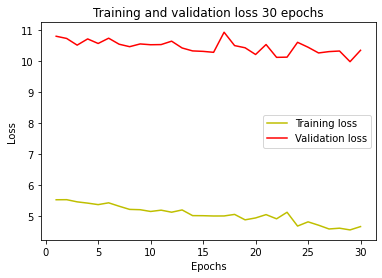

In [117]:
from matplotlib import pyplot as plt 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(loss) + 1) 
plt.plot(epochs, loss, 'y', label='Training loss') 
plt.plot(epochs, val_loss, 'r', label='Validation loss') 
plt.title('Training and validation loss 30 epochs') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 
plt.show() 

Nous pouvons voir qu'après 30 époques, la fonction de perte nous indique une erreur de 10,5 tant que l'autre est proche de 5.

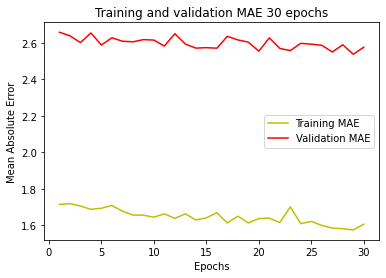

In [118]:
mae = history.history['mae'] 
val_mae = history.history['val_mae'] 
plt.plot(epochs, mae, 'y', label='Training MAE') 
plt.plot(epochs, val_mae, 'r', label='Validation MAE') 
plt.title('Training and validation MAE 30 epochs') 
plt.xlabel('Epochs') 
plt.ylabel('Mean Absolute Error') 
plt.legend() 
plt.show()

In [119]:
predictions = model.predict(X_test_scaled[:5]) 
print("Predicted values are: ", predictions) 
print("Real values are: ", y_test[:5]) 

Predicted values are:  [[19.055632]
 [20.274704]
 [20.924162]
 [20.627903]
 [13.239877]]
Real values are:  498    21.2
94     20.6
150    21.5
221    21.7
423    13.4
Name: PRICE, dtype: float64


In [120]:
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test) 
print('Mean squared error from neural net: ', mse_neural) 
print('Mean absolute error from neural net: ', mae_neural)

4/4 [==============================] - 0s 3ms/step - loss: 14.6962 - mae: 2.7738
Mean squared error from neural net:  14.696152687072754
Mean absolute error from neural net:  2.773848295211792


# *Exercice 4 : Comparaison des performances*
Les performances de ce réseau de neurones profonds sont comparées à des algorithmes classiques 
d’apprentissage statistique (régréssion linéaire, arbre de decision, random Forest). 


In [128]:
from sklearn import linear_model 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [129]:
lr_model = linear_model.LinearRegression() #choisir un modèle : regression linéaire
lr_model.fit(X_train_scaled, y_train) #entrainer le modèle
y_pred_lr = lr_model.predict(X_test_scaled) # faire la prédiction

In [130]:
mse_lr = mean_squared_error(y_test, y_pred_lr) 
mae_lr = mean_absolute_error(y_test, y_pred_lr) 
print('Mean squared error from linear regression: ', mse_lr) 
print('Mean absolute error from linear regression: ', mae_lr)

Mean squared error from linear regression:  16.49535197593168
Mean absolute error from linear regression:  3.0558941538909594


RN : 

* Mean squared error from neural net:  13.830933570861816

* Mean absolute error from neural net:  2.755727767944336

modele LinR : 
* Mean squared error from linear regression:  16.49535197593167
* Mean absolute error from linear regression:  3.055894153890959

le réseau de neurones est plus performent que la modèle de Regression linéaire parce qu'il nous donne le moindre erreur

In [131]:
tree = DecisionTreeRegressor() #algorithme arbre de décision.
tree.fit(X_train_scaled, y_train) #entrainement du modèle sur le jeu de données d'entrainement
y_pred_tree = tree.predict(X_test_scaled) #prédiction du label basée sur les données du test

In [132]:
mse_dt = mean_squared_error(y_test, y_pred_tree) 
mae_dt = mean_absolute_error(y_test, y_pred_tree) 
print('Mean squared error using decision tree: ', mse_dt) 
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  19.065294117647056
Mean absolute error using decision tree:  3.2372549019607844


Le réseau de neurones est plus performant que l'Arbre de décision

In [133]:
from sklearn.ensemble import RandomForestRegressor 
model = RandomForestRegressor(n_estimators = 30, random_state=30) 
# Modèle RandomForestRegressor avec 30 arbres | random_state est la graine utilisée par le générateur de nombres aléatoires ;
model.fit(X_train_scaled, y_train) 
# Entrainement du modèle
y_pred_RF = model.predict(X_test_scaled)
# Prédiction

In [134]:
mse_RF = mean_squared_error(y_test, y_pred_RF) 
mae_RF = mean_absolute_error(y_test, y_pred_RF) 
print('Mean squared error using Random Forest: ', mse_RF) 
print('Mean absolute error Using Random Forest: ', mae_RF) 

Mean squared error using Random Forest:  12.701104793028327
Mean absolute error Using Random Forest:  2.408235294117647


Random Forest pour une 30 d'arbre donne moins d'erreurs que le réseau de neuronespour avec 30 epochs